In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Heart Disease.csv')

In [3]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
df.shape

(319795, 18)

In [5]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [7]:
df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [8]:
df.shape

(319795, 18)

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(319795, 18)

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(301717, 18)

In [13]:
df.HeartDisease.value_counts()

No     274456
Yes     27261
Name: HeartDisease, dtype: int64

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

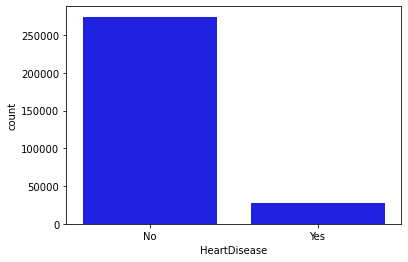

In [14]:
sns.countplot(df['HeartDisease'],color='blue')

In [15]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,301717.000000,301717.000000,301717.000000,301717.000000
mean,28.441970,3.572298,4.121475,7.084559
std,6.468134,8.140656,8.128288,1.467122
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.410000,0.000000,0.000000,7.000000
75%,31.650000,2.000000,4.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


<AxesSubplot:>

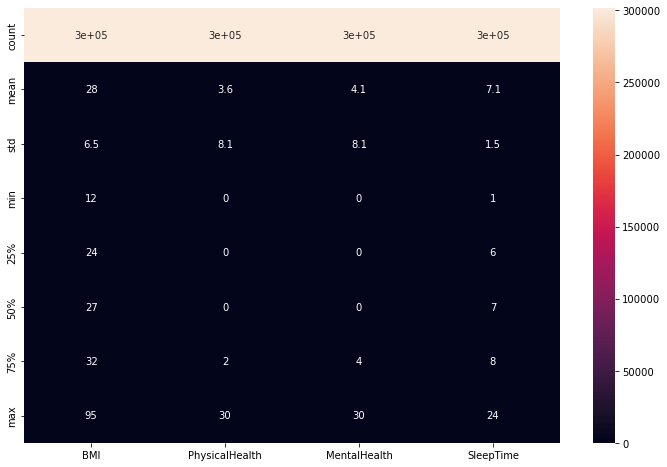

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(df.describe() , annot=True)

In [17]:
df.corr()

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.103813,0.056724,-0.048653
PhysicalHealth,0.103813,1.000000,0.279657,-0.058406
MentalHealth,0.056724,0.279657,1.000000,-0.117078
SleepTime,-0.048653,-0.058406,-0.117078,1.000000


<AxesSubplot:>

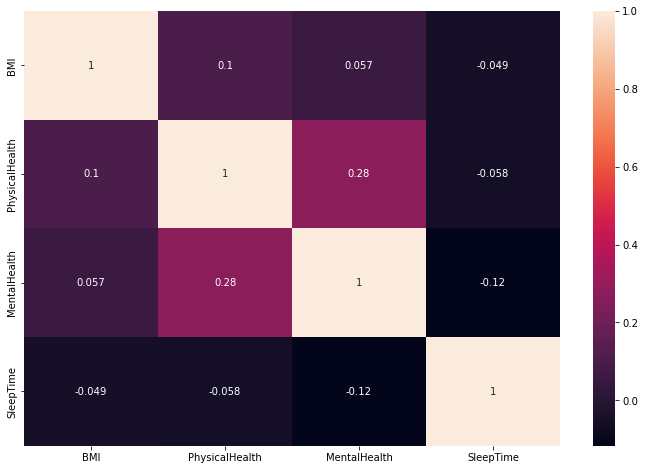

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr() , annot=True)

# Encode the data set

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
label=LabelEncoder()

In [21]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [22]:
from pandas.core.dtypes.common import is_numeric_dtype

for column in df.columns:
    if is_numeric_dtype(df[column]):
        continue
    else:
        df[column] = label.fit_transform(df[column])

In [23]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


# seperate x, y

In [24]:
x = df.drop('HeartDisease',axis=1)
y = df['HeartDisease'] 

In [25]:
x.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


In [26]:
x.shape

(301717, 17)

In [27]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: HeartDisease, dtype: int32

In [28]:
y.shape

(301717,)

# Synthetic Minority Oversampling Technique

In [29]:
!pip install imblearn

In [30]:
from imblearn.combine import SMOTETomek

In [31]:
sm=SMOTETomek(random_state=100)

In [32]:
X,Y=sm.fit_resample(x,y)

In [33]:
X.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


In [34]:
Y.value_counts()

0    271852
1    271852
Name: HeartDisease, dtype: int64

In [35]:
y.value_counts()

0    274456
1     27261
Name: HeartDisease, dtype: int64

# Hold Out Cross Validation

In [36]:
from sklearn.model_selection import train_test_split 

In [37]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, train_size=.75,random_state=42) 

In [38]:
xtrain.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
14438,35.670000,1,0,0,0.0,0.0,0,0,7,5,0,1,4,8.0,0,0,0
372846,20.502401,0,0,0,0.0,0.0,0,0,8,5,0,1,4,8.0,0,0,0
232441,19.740000,0,0,0,4.0,0.0,0,0,12,5,2,1,2,7.0,0,0,0
95766,26.370000,1,0,0,0.0,0.0,0,0,11,5,2,0,2,7.0,0,0,0
113069,20.800000,0,0,0,0.0,12.0,0,0,7,5,0,1,0,8.0,0,0,0


In [39]:
xtrain.shape

(407778, 17)

In [40]:
xtest.shape

(135926, 17)

# Decision Tree Classifier

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
dclf=DecisionTreeClassifier()

In [43]:
dclf.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [44]:
dclf.score(xtrain, ytrain)

0.9983544968095385

In [45]:
dclf.score(xtest, ytest)

0.8679796359784

In [46]:
pred=(dclf.predict(xtest))

In [47]:
pred

array([1, 1, 0, ..., 1, 1, 0])

In [48]:
print(ytest)

384991    1
312169    1
452629    1
528241    1
292044    0
         ..
283665    0
227228    0
361559    1
348880    1
50202     0
Name: HeartDisease, Length: 135926, dtype: int32


# XGBoost Classifier

In [49]:
!pip install xgboost

In [50]:
import xgboost 
from xgboost import XGBClassifier

In [51]:
xgb = XGBClassifier()

In [52]:
xgb.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [53]:
xgb.score(xtest,ytest)

0.8657431249356268

In [54]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


# Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rclf=RandomForestClassifier()

In [57]:
rclf.fit(xtrain, ytrain)

RandomForestClassifier()

In [58]:
rclf.score(xtest, ytest)

0.9063828848049674

# KNN Classifier

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knclf = KNeighborsClassifier(n_neighbors=2501)

In [60]:
knclf.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=2501)

In [61]:
knclf.score(xtest, ytest)

0.7239380251018936

# Logistics Regression

In [62]:
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression()

In [63]:
logit.fit(xtrain,ytrain)

LogisticRegression()

In [64]:
logit.score(xtest,ytest)

0.7343995997822345

# K Fold Cross Validation

In [65]:
from sklearn.model_selection import KFold, cross_val_score, cross_validate

In [66]:
kfold = KFold(n_splits=4, shuffle=True)

In [67]:
result = cross_val_score(rclf, X, Y, cv=kfold) 

In [68]:
result

array([0.90625782, 0.90658152, 0.90714065, 0.90839133])

In [69]:
result.mean()

0.9070928299221634

In [70]:
result.max()

0.9083913305769316

# Stratified k fold cross Validation

In [71]:
from sklearn.model_selection import StratifiedKFold

In [72]:
st = StratifiedKFold(n_splits=4)

In [73]:
score2 = cross_val_score(rclf, X, Y,cv=st)

In [74]:
score2

array([0.85534776, 0.91557907, 0.91968424, 0.91950032])

In [75]:
score2.max()

0.9196842399540927

In [76]:
score2.min()

0.8553477627532629

In [77]:
score2.mean()

0.9025278460338714

# Oversample using Adaptive Synthetic (ADASYN) algorithm.

In [78]:
from imblearn.over_sampling import ADASYN

In [79]:
ada = ADASYN()

In [80]:
X_resampled, Y_resampled = ada.fit_resample(x,y)

In [81]:
Y_resampled.value_counts()

0    274456
1    273088
Name: HeartDisease, dtype: int64

In [82]:
from sklearn.model_selection import train_test_split 
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(X_resampled, Y_resampled, test_size=.30,random_state=44) 


In [83]:
dclf.fit(xtrain2, ytrain2)

DecisionTreeClassifier()

In [84]:
dclf.score(xtest2,ytest2)

0.8554765499439926

In [85]:
rclf.fit(xtrain2, ytrain2)

RandomForestClassifier()

In [86]:
rclf.score(xtest2,ytest2)

0.8955522816928846

# Near Miss for Under_Sampling

In [87]:
from imblearn.under_sampling import NearMiss

In [88]:
NearMiss_obj = NearMiss()
new_x , new_y = NearMiss_obj.fit_resample(x,y)

In [89]:
new_y.value_counts()

0    27261
1    27261
Name: HeartDisease, dtype: int64

In [90]:
from sklearn.model_selection import train_test_split 
xtrain3, xtest3, ytrain3, ytest3 = train_test_split(new_x, new_y, test_size=.30,random_state=44) 


In [91]:
rclf.fit(xtrain3, ytrain3)

RandomForestClassifier()

In [92]:
rclf.score(xtest3,ytest3)

0.8235617778321208

# Random Over Sampling

In [93]:
from imblearn.over_sampling import RandomOverSampler

In [94]:
over = RandomOverSampler(random_state=100)

In [95]:
x_new , y_new = over.fit_resample(x,y)

In [96]:
y_new.value_counts()

0    274456
1    274456
Name: HeartDisease, dtype: int64

In [97]:
from sklearn.model_selection import train_test_split 
xtrain4, xtest4, ytrain4, ytest4 = train_test_split(x_new, y_new, test_size=.30,random_state=44) 


In [98]:
dclf.fit(xtrain4, ytrain4)

DecisionTreeClassifier()

In [99]:
dclf.score(xtest4,ytest4) #Using Decision tree classifier

0.9477695325309399

In [100]:
rclf.fit(xtrain4, ytrain4)

RandomForestClassifier()

In [101]:
rclf.score(xtest4,ytest4)#Using Random forest classifier

0.9641837812890924

In [102]:
pred4y=(rclf.predict(xtest4))

In [103]:
pred4y

array([1, 0, 1, ..., 0, 0, 1])

In [104]:
print(ytest4)

442864    1
262738    0
147429    0
443854    1
490691    1
         ..
394269    1
467124    1
271114    0
225773    0
275571    0
Name: HeartDisease, Length: 164674, dtype: int32


# Confusion Matrix

In [105]:
from sklearn.metrics import classification_report, roc_curve,plot_roc_curve,confusion_matrix,accuracy_score

In [106]:
print(classification_report(ytest4,pred4y)) 

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     82482
           1       0.93      1.00      0.97     82192

    accuracy                           0.96    164674
   macro avg       0.97      0.96      0.96    164674
weighted avg       0.97      0.96      0.96    164674



In [107]:
cm=confusion_matrix(ytest4,pred4y) #confusion matrix 
cm


array([[76634,  5848],
       [   50, 82142]], dtype=int64)

In [108]:
accuracy_score(ytest4,pred4y)

0.9641837812890924

<AxesSubplot:>

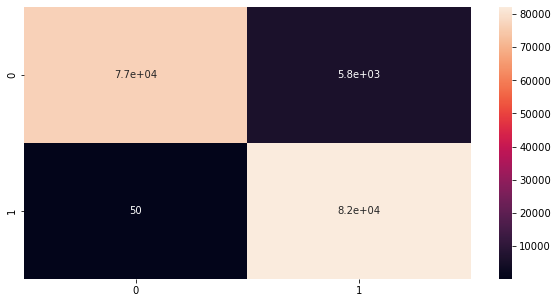

In [109]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True)

In [110]:
tp, fn, fp, tn = confusion_matrix(ytest4 , pred4y).reshape(-1)

# Precision or Positive predictive Value(PPV) & Recall

In [111]:
Precision=tp/(tp+fp)

In [112]:
print(Precision)

0.9993479735016431


In [113]:
Recall=tp/(tp+fn)

In [114]:
Recall

0.929099682354938

# True Positive Rate

In [115]:
TPR=tp/(tp+fn)

In [116]:
print(TPR)

0.929099682354938


# False Positive Rate or 1-Specificity

In [117]:
FPR=fp/(fp+tn)

In [118]:
print(FPR)

0.000608331711115437


# F1 Measure

In [119]:
f1_measure=(Precision+Recall)/2

In [120]:
print(f1_measure)

0.9642238279282905


# Harmonic Mean, F1 Score

In [121]:
f1_score=(2*Precision*Recall)/(Precision+Recall)

In [122]:
print(f1_score)

0.9629443474108792


# Specificity, Selectivity or True Negative Rate(TNR)

In [123]:
Specificity=tn/(tn+fp)

In [124]:
print(Specificity)

0.9993916682888846


# Threat Score(TS) or Critical Success Index(CSI)

In [125]:
CSI=tp/(tp+fn+fp)

In [126]:
print(CSI)

0.9285368099646197


# False Discovery Rate (FDR)

In [127]:
FDR=fp/(tp+fp)

In [128]:
print(FDR)

0.0006520264983568932


# MSE and MAE

In [129]:
from sklearn.metrics import mean_absolute_error

In [130]:
mae=mean_absolute_error(ytest4,pred4y)

In [131]:
mae

0.035816218710907614

In [132]:
from sklearn.metrics import mean_squared_error

In [133]:
mse=mean_squared_error(ytest4,pred4y)

In [134]:
mse

0.035816218710907614

# ROC

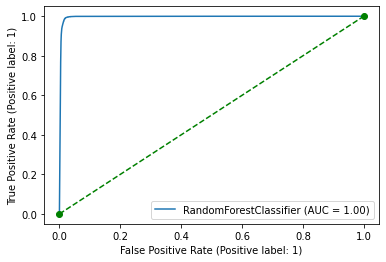

In [135]:
plot_roc_curve(rclf, xtest4, ytest4) ##Using Random forest classifier
plt.plot([0,1],[0,1],'go--')